<a href="https://colab.research.google.com/github/Faizan-Jamil91/NED-DS-Deep-learning-/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [4]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Admission_Predict_Ver1.1.csv']))

In [5]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
from sklearn.model_selection import train_test_split

# Drop the Serial No. column
data = data.drop(columns=['Serial No.'])

# Check for missing values
missing_values = data.isnull().sum()

# Split the data into features and target variable
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

missing_values


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.003704655398788405, 0.8188432567829631)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
10/10 - 4s - 412ms/step - loss: 169.3189 - mae: 11.4619 - val_loss: 3.0086 - val_mae: 1.7257
Epoch 2/100
10/10 - 0s - 48ms/step - loss: 31.9200 - mae: 4.9928 - val_loss: 1.3785 - val_mae: 1.1630
Epoch 3/100
10/10 - 0s - 29ms/step - loss: 12.3986 - mae: 3.0777 - val_loss: 4.5804 - val_mae: 2.1351
Epoch 4/100
10/10 - 0s - 37ms/step - loss: 5.2240 - mae: 2.0296 - val_loss: 4.5860 - val_mae: 2.1341
Epoch 5/100
10/10 - 0s - 25ms/step - loss: 2.2343 - mae: 1.3410 - val_loss: 1.8161 - val_mae: 1.3402
Epoch 6/100
10/10 - 0s - 25ms/step - loss: 0.6914 - mae: 0.7486 - val_loss: 0.0817 - val_mae: 0.2487
Epoch 7/100
10/10 - 0s - 26ms/step - loss: 0.1891 - mae: 0.3694 - val_loss: 0.1343 - val_mae: 0.3361
Epoch 8/100
10/10 - 0s - 21ms/step - loss: 0.1184 - mae: 0.2977 - val_loss: 0.1074 - val_mae: 0.2966
Epoch 9/100
10/10 - 0s - 22ms/step - loss: 0.0615 - mae: 0.2025 - val_loss: 0.0293 - val_mae: 0.1405
Epoch 10/100
10/10 - 0s - 32ms/step - loss: 0.0395 - mae: 0.1598 - val_loss: 0.0390 -

In [12]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Mean Absolute Error: {mae}')


4/4 - 0s - 7ms/step - loss: 0.0154 - mae: 0.1006
Mean Absolute Error: 0.10061709582805634


In [13]:
# Make predictions
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


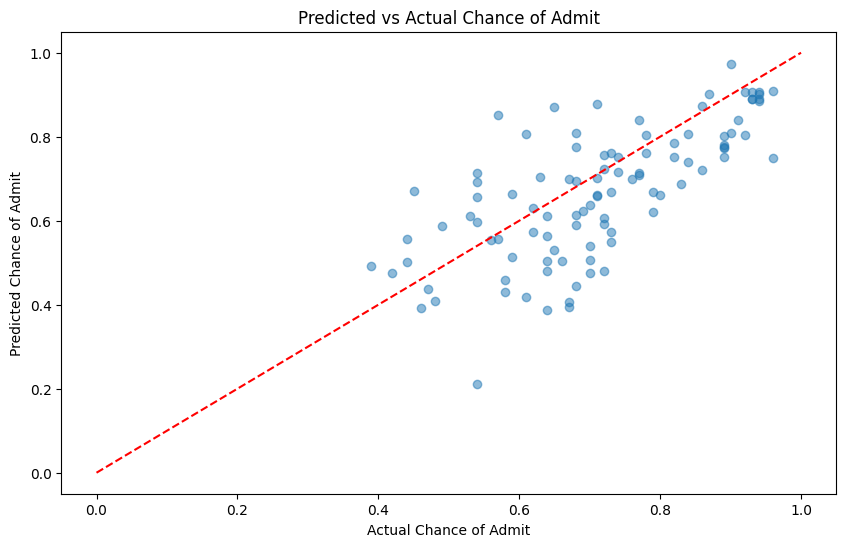

Actual: 0.93, Predicted: [0.8887474]
Actual: 0.84, Predicted: [0.80569714]
Actual: 0.39, Predicted: [0.49182954]
Actual: 0.77, Predicted: [0.71442384]
Actual: 0.74, Predicted: [0.75111216]
Actual: 0.89, Predicted: [0.80162686]
Actual: 0.47, Predicted: [0.43840852]
Actual: 0.57, Predicted: [0.8505327]
Actual: 0.68, Predicted: [0.69487494]
Actual: 0.82, Predicted: [0.75283736]


In [14]:
import matplotlib.pyplot as plt
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Predicted vs Actual Chance of Admit')
plt.show()
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 0.9300, Predicted: 0.8887
Actual: 0.8400, Predicted: 0.8057
Actual: 0.3900, Predicted: 0.4918
Actual: 0.7700, Predicted: 0.7144
Actual: 0.7400, Predicted: 0.7511
Actual: 0.8900, Predicted: 0.8016
Actual: 0.4700, Predicted: 0.4384
Actual: 0.5700, Predicted: 0.8505
Actual: 0.6800, Predicted: 0.6949
Actual: 0.8200, Predicted: 0.7528


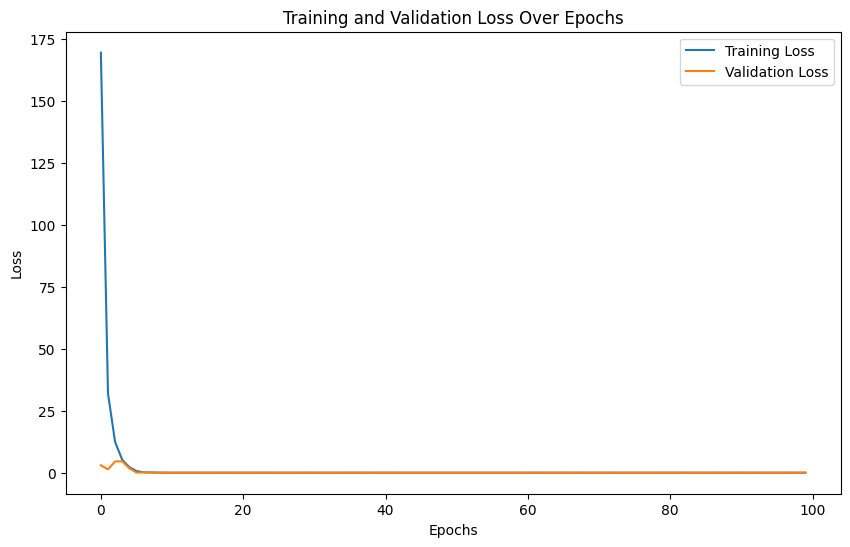

In [15]:
# Print some example predictions
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual:.4f}, Predicted: {predicted[0]:.4f}')

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()